In [2]:
# @title Install dependencies

!pip install pandas --quiet
!pip install seaborn --quiet

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})
sns.set_style('white')

In [3]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

*Acknowledgement*:

This notebook is modified from a [tutorial](https://compneuro.neuromatch.io/projects/neurons/README.html) created by teams at Allen Institute.

---

# **P1**: Allen Institute Visual Behavior 2P data
### This dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task.
In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward.

### Why Allen Institute conduct this expeirment?
The neural changes that occur to support adaptive behavior in a dynamically changing environment are not well understood.   

Details about the study design see the [technical whitepaper](https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/4e/be/4ebe2911-bd38-4230-86c8-01a86cfd758e/visual_behavior_2p_technical_whitepaper.pdf).


<figure>
<center>
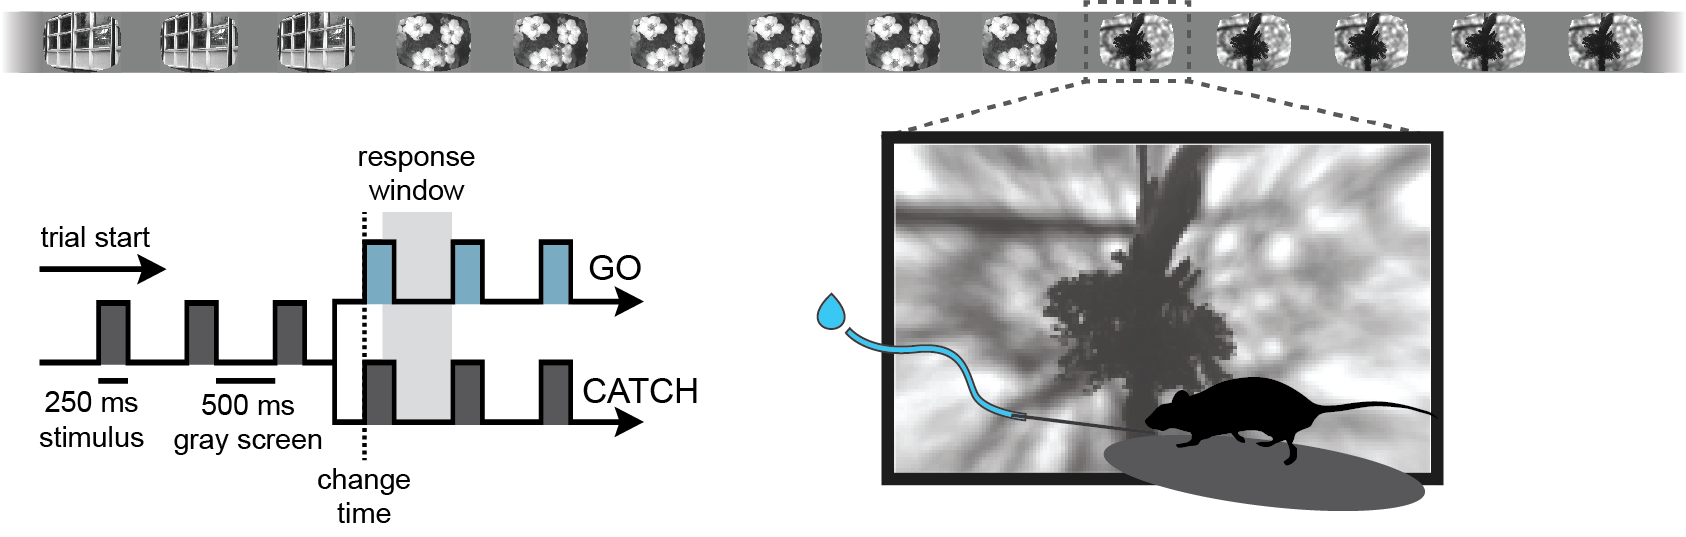
<figcaption>change detection task </figcaption></center>
</figure>

##### In some sessions, the mice perform the task with **familiar images** they have seen many times during training. In other sessions, mice perform the task with **novel images**.

##### The same population of cells is imaged over multiple days with varying sensory and behavioral conditions.

##### Multiple cortical areas and depths were measured concurently in each session, and data was collected from **excitatory** and **inhibitory** neural populations.

##### We will take a look at a subset of the data, focusing on two inhibitory types - **VIP** and **SST** neurons.

<figure>
<center>
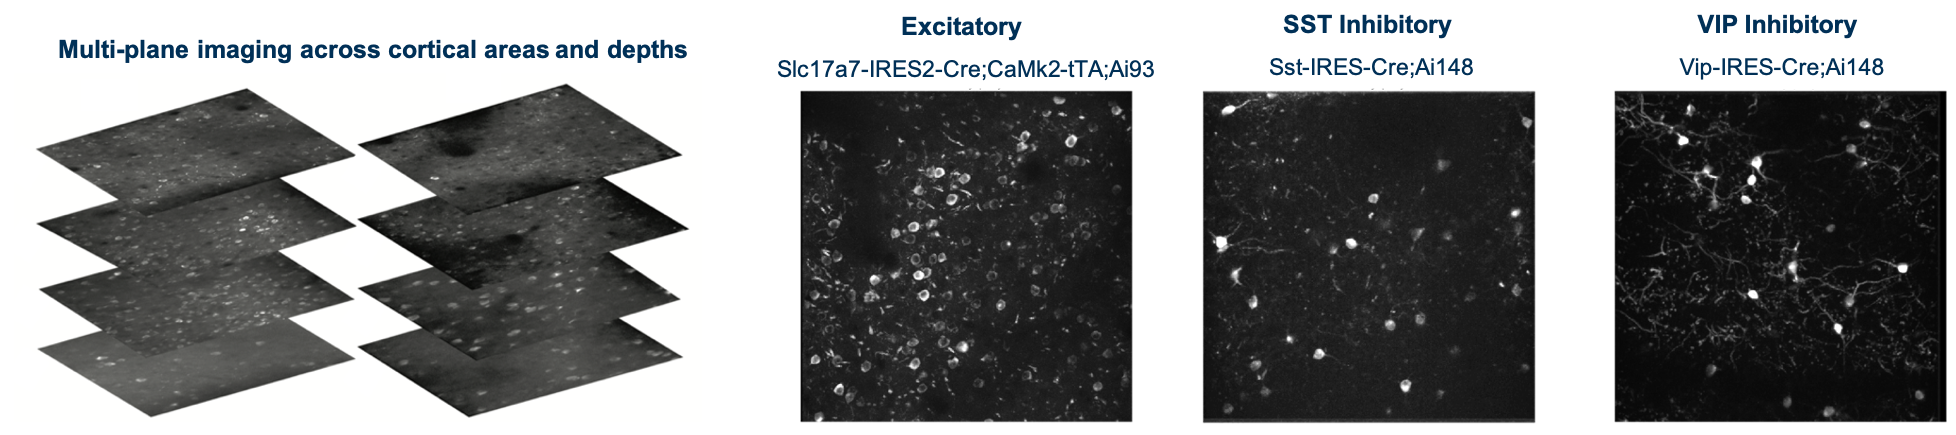
<figcaption></figcaption></center>
</figure>

### What other data were recorded?
During task performance, the timing of behavioral responses (**licks**) and **earned rewards** are recorded, as well as **mouse running speed** on the disk. During imaging sessions, **eye position** and **pupil area** are also recorded as a measurement of overall arousal and state.

<figure>
<center>
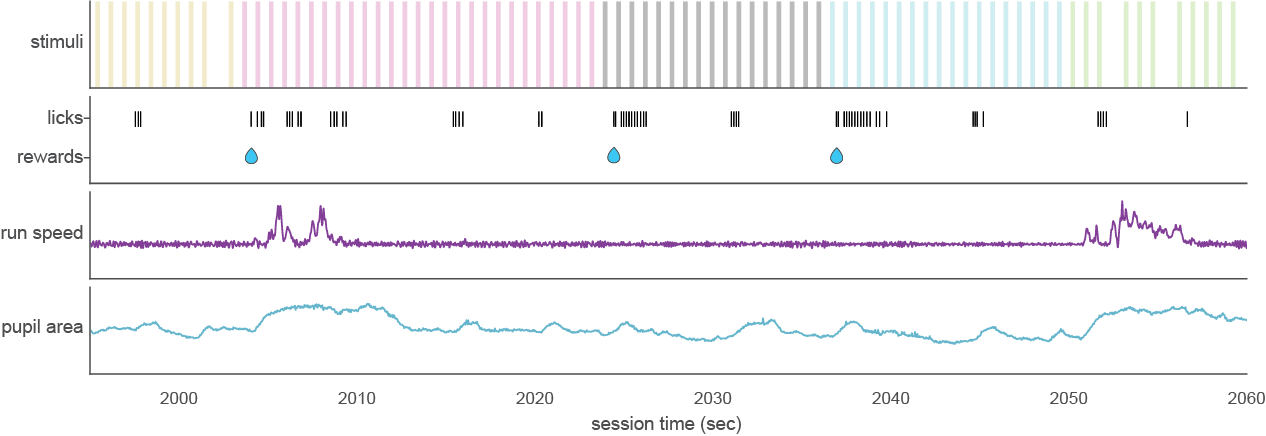
</figure>

### Let's take a first look at the data!



*   The preprocessed data is organized as a pandas dataframe.
*   Each row contains all data for a given cell on a given trial



In [4]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename) # read preprocessed cell data

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.sample(5) # take a look example rows

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,...,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
273070,3054,1086492555,"[0.05558951944112778, -0.09819888323545456, -0...","[-1.2281077102807074, -1.195789086325952, -1.1...",0.001903,-0.016081,im031,6,True,False,...,933463604,928325203,933830753,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,M,134.0,familiar
165976,1364,1086496500,"[0.021794000640511513, -0.02950415574014187, 0...","[-1.228177527630313, -1.195857066376884, -1.16...",-0.027041,-0.026205,omitted,8,False,True,...,994883056,991913453,994894518,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,200.0,novel
1456810,2381,1086562430,"[-0.03984192758798599, -0.12586839497089386, 0...","[-1.2282367960132226, -1.1959147750655061, -1....",0.061421,0.020668,im085,6,True,False,...,1005018474,1000740620,1005032062,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,166.0,novel
84299,201,1086497908,"[-0.10856475681066513, -0.0195988267660141, 0....","[-1.2281638329897349, -1.195843732121584, -1.1...",0.100356,-0.019880,im035,7,True,False,...,994731371,991913453,994743822,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,199.0,familiar
1409296,1024,1086573070,"[0.07453058660030365, -0.012464807368814945, 0...","[-1.2282367960132226, -1.1959147750655061, -1....",0.000868,-0.010866,im066,2,True,False,...,1005018474,1000740620,1005032062,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,166.0,novel


Although some of the column informations are redundant (shared among cells/rows), organizing data by neurons make population analysis convenient.

In [7]:
print(data.columns) # take a look at the columns

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response', 'image_name',
       'image_index', 'is_change', 'omitted', 'mean_running_speed',
       'mean_pupil_area', 'response_latency', 'rewarded',
       'ophys_experiment_id', 'imaging_depth', 'targeted_structure',
       'cre_line', 'session_type', 'session_number', 'mouse_id',
       'ophys_session_id', 'ophys_container_id', 'behavior_session_id',
       'full_genotype', 'reporter_line', 'driver_line', 'indicator', 'sex',
       'age_in_days', 'exposure_level'],
      dtype='object')


In [8]:
print('exposure_levels:', data.exposure_level.unique()) # two type of sessions included: familiar and novel

exposure_levels: ['familiar' 'novel']


In [9]:
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique()) # two tpye of cell: sst and vip

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']



## How are **VIP** and **SST** cells affected by stimulus novelty?

Both receives robust modulatory signals from e.g., the anteromedial cortex, that might feedback information for siginal novelty [(Zhang et al. 2014)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5776147/).

In [10]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.is_change == True)] # subset data by cell type
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.is_change == True)]

Plot population activity for VIP and SST neurons before and after the stimulus changes.

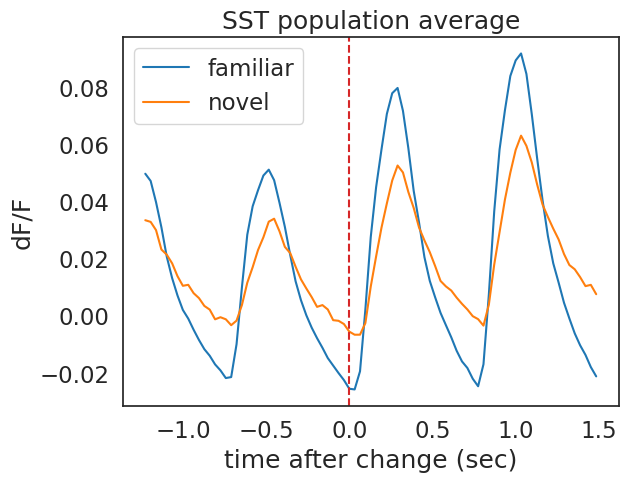

In [11]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique(): # plot seperately for familar and novel sessions
  traces = sst_data[sst_data.exposure_level==exposure_level].trace.values # get dF/F traces for all cells
  plt.plot(timestamps, np.mean(traces), label=exposure_level) # plot population mean
plt.axvline(c = 'C3', ls = '--')
plt.title('SST population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

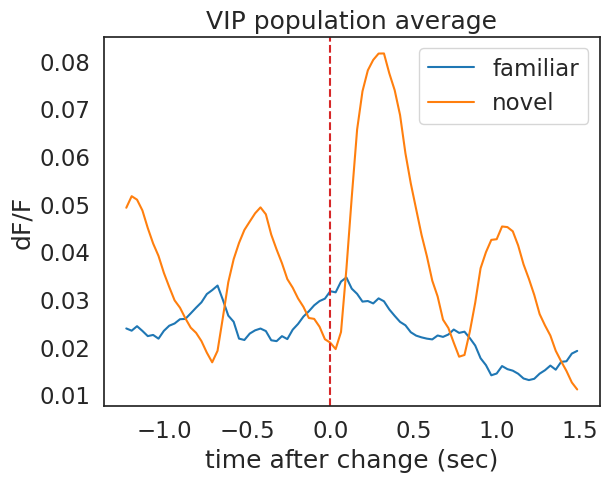

In [12]:
timestamps = vip_data.trace_timestamps.values[0]
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.axvline(c = 'C3', ls = '--')
plt.title('VIP population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Let's look at behaviral data as well. Pupil area and running speed are both great indicator of animal's arousal level, and should be correlated.

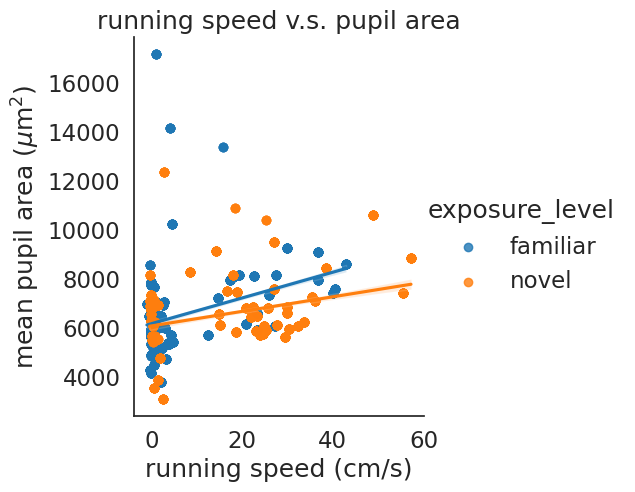

In [13]:
sub_list = random.sample(vip_data.stimulus_presentations_id.unique().tolist(), 100) # subsample number of cells to plot regression
vip_sub = vip_data[vip_data['stimulus_presentations_id'].isin(sub_list)]
sns.lmplot(data=vip_sub, x="mean_running_speed", y="mean_pupil_area", hue="exposure_level") # plot linear regression to see the positive correlation
plt.title('running speed v.s. pupil area')
plt.ylabel('mean pupil area ($\mu$m$^2$)')
plt.xlabel('running speed (cm/s)')
plt.show()

### Now it's your turn to explore the data set!

*   Can you find cells that were imaged across multiple sessions? How do single cells change depending on the image set?
*   What about trial to trial variability? How does the response of a single cell vary across a session?
*   How do SST and VIP cells respond when stimuli are omitted? (Hint: use the column `omitted` to subset the data)

<br/>
<br/>

---



### To access the full dataset using `AllenSDK`, check out the additional tutorials from the Allen Institute here:

https://colab.research.google.com/drive/163dPehppRK6JeHypgfB3gyaGQqKshNQc?usp=sharing

and in the 'Getting Started' section here:

https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html



